In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style = "darkgrid")

In [2]:
loan = pd.read_csv("/content/drive/MyDrive/Projects/Internship Assignment Reunion/loan.csv")
applicant = pd.read_csv("/content/drive/MyDrive/Projects/Internship Assignment Reunion/applicant.csv")
loan.head(2)

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1


In [3]:
applicant.head(2)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac


Since we have two different datasets lets first join them

In [4]:
df = pd.merge(loan,applicant,on='applicant_id',how="left")
df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,...,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,...,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,...,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,...,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,...,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,...,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [5]:
df.shape

(1000, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   loan_application_id                                       1000 non-null   object
 1   applicant_id                                              1000 non-null   int64 
 2   Months_loan_taken_for                                     1000 non-null   int64 
 3   Purpose                                                   988 non-null    object
 4   Principal_loan_amount                                     1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income               1000 non-null   int64 
 6   Property                                                  846 non-null    object
 7   Has_coapplicant                                           1000 non-null   int64 
 8   Has_guarantor                

In [7]:
len(df["applicant_id"].unique())

1000

## Data Cleaning

we dont need application_id and loan_id so lets drop them

Other EMI plans has too many null values also we don't need the Telephone column so lets drop them

Lets drop all these columns

In [8]:
df = df.drop(['applicant_id','loan_application_id','Other_EMI_plans',"Telephone"],axis=1)

**Checking the purpose column**

first lets fill the null values with not mentioned

In [10]:
df['Purpose'] = df['Purpose'].fillna("Not Mentioned")

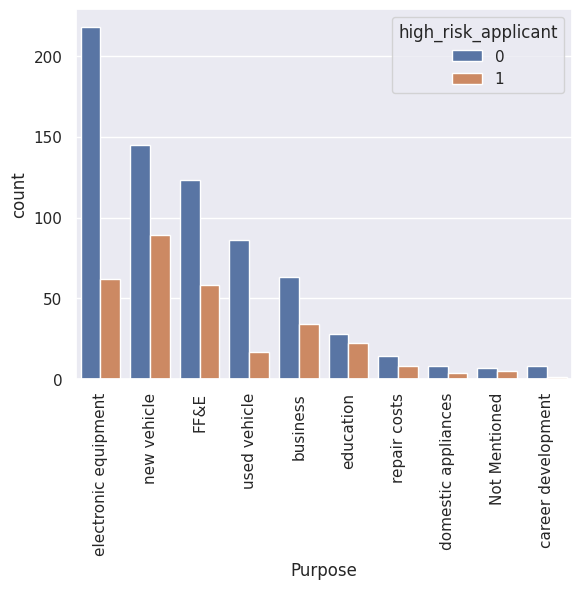

In [11]:
sns.countplot(x="Purpose",hue="high_risk_applicant",data=df,order=df["Purpose"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

We can see that people taking loans for electronic equipment usually are low_risk, while people taking loans for business and education are relatively high risk

**Property Column**

In [12]:
df['Property'].value_counts()

car or other                                         332
real estate                                          282
building society savings agreement/life insurance    232
Name: Property, dtype: int64

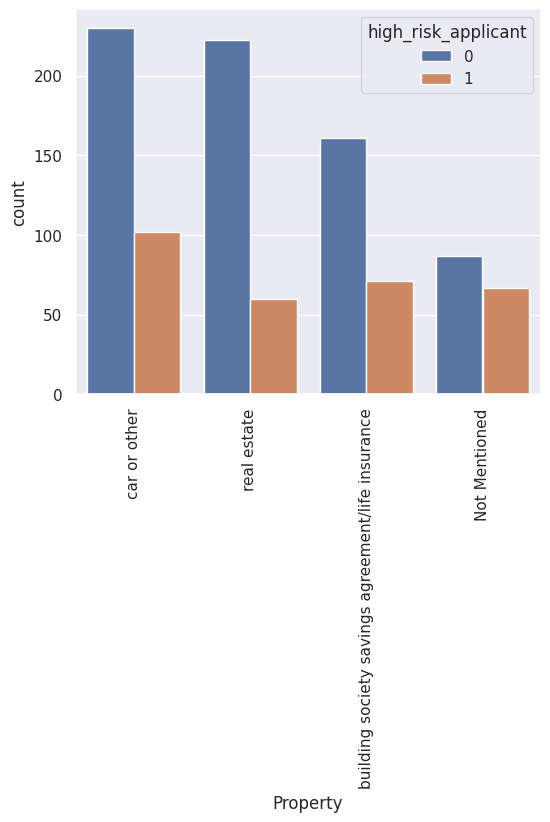

In [13]:
plt.figure(figsize=(6,5))
df['Property'] = df["Property"].fillna("Not Mentioned")
sns.countplot(x="Property",hue="high_risk_applicant",data=df,order=df["Property"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Most people with Real estate are low risk

Employment duration of applicant

We can replace employment duration with 0 if it is null in both at_most and at_least

In [14]:
least = []
most = []
for i in range(len(df)):
  if pd.isna(df.iloc[i]["Has_been_employed_for_at_most"]) and pd.isna(df.iloc[i]["Has_been_employed_for_at_least"]):
    least.append(0)
    most.append(0)

  elif pd.isna(df.iloc[i]["Has_been_employed_for_at_most"]):
    least.append(df.iloc[i]["Has_been_employed_for_at_least"])
    most.append(df.iloc[i]["Has_been_employed_for_at_least"])

  elif pd.isna(df.iloc[i]["Has_been_employed_for_at_least"]):
    least.append(df.iloc[i]["Has_been_employed_for_at_most"])
    most.append(df.iloc[i]["Has_been_employed_for_at_most"])

  else:
    least.append(df.iloc[i]["Has_been_employed_for_at_least"])
    most.append(df.iloc[i]["Has_been_employed_for_at_most"])
    
df['Has_been_employed_for_at_most'] = most
df['Has_been_employed_for_at_least'] = least

In [15]:
import re
def get_year(x):
  numbers = re.findall(r'[0-9]+', x)
  return int(numbers[0])
df['Has_been_employed_for_at_most'] = df['Has_been_employed_for_at_most'].apply(lambda x : get_year(x))
df['Has_been_employed_for_at_least'] = df['Has_been_employed_for_at_least'].apply(lambda x : get_year(x))

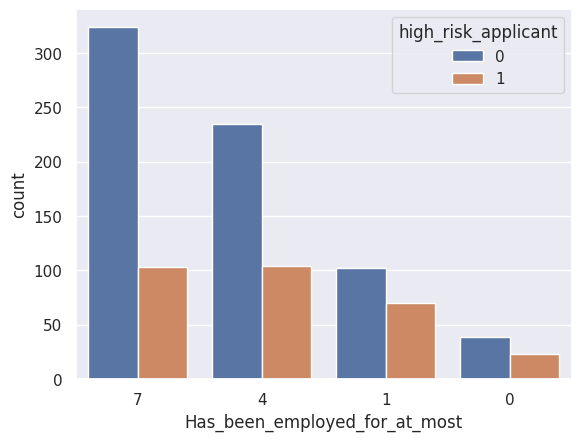

In [16]:
col = 'Has_been_employed_for_at_most'
sns.countplot(x=col,hue="high_risk_applicant",data=df,order=df[col].value_counts().index)
plt.show()

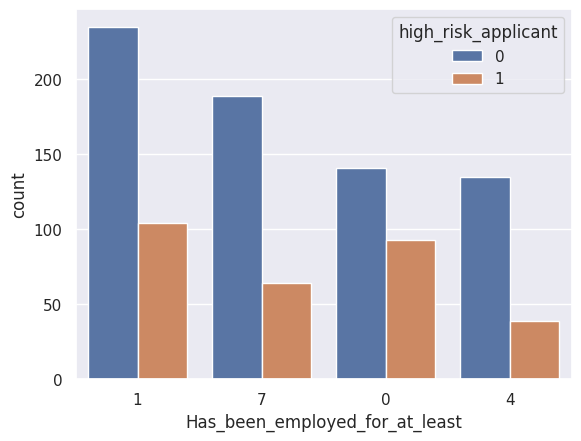

In [17]:
col = 'Has_been_employed_for_at_least'
sns.countplot(x=col,hue="high_risk_applicant",data=df,order=df[col].value_counts().index)
plt.show()

<ipython-input-18-5cb2e94c95d9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Has_been_employed_for_at_least"])


<Axes: xlabel='Has_been_employed_for_at_least', ylabel='Density'>

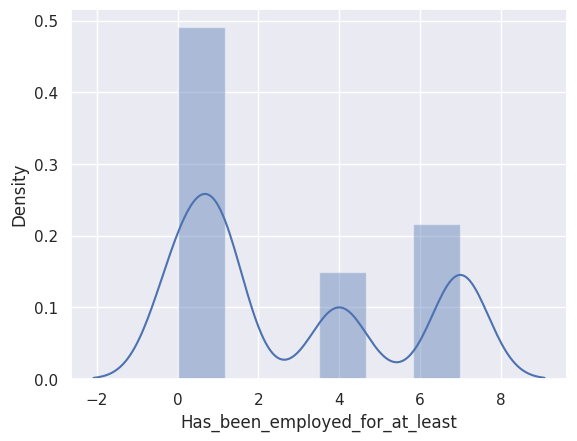

In [18]:
sns.distplot(df["Has_been_employed_for_at_least"])

In [19]:
df.isna().sum()

Months_loan_taken_for                                         0
Purpose                                                       0
Principal_loan_amount                                         0
EMI_rate_in_percentage_of_disposable_income                   0
Property                                                      0
Has_coapplicant                                               0
Has_guarantor                                                 0
Number_of_existing_loans_at_this_bank                         0
Loan_history                                                  0
high_risk_applicant                                           0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence              

**Lets tackle Saving accounts balance related null values**

In [20]:
col1 = "Savings_account_balance"
col2 = "Balance_in_existing_bank_account_(lower_limit_of_bucket)"
col3 = "Balance_in_existing_bank_account_(upper_limit_of_bucket)"

In [22]:
savings_df = df[[col1,col2,col3]]
savings_df.head(2)

,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,NaN,NaN,0
1,Low,0,2 lac


In [23]:
savings_df[col1].unique()

array([nan, 'Low', 'High', 'Very high', 'Medium'], dtype=object)

There is no pattern between the savings account balance and lower_limit_of_bucket and upper_limit_of_bucket. So, I think it is best to drop them. I am replacing all null values in savings account balance with Not mentioned and keeping it as a seperate category

In [30]:
df[col1] = df[col1].fillna("Not Mentioned")
df = df.drop([col2,col3],axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Months_loan_taken_for                        1000 non-null   int64 
 1   Purpose                                      1000 non-null   object
 2   Principal_loan_amount                        1000 non-null   int64 
 3   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 4   Property                                     1000 non-null   object
 5   Has_coapplicant                              1000 non-null   int64 
 6   Has_guarantor                                1000 non-null   int64 
 7   Number_of_existing_loans_at_this_bank        1000 non-null   int64 
 8   Loan_history                                 1000 non-null   object
 9   high_risk_applicant                          1000 non-null   int64 
 10  Primary_appli

There are no null values now we can proceed with eda

## EDA

Seperating numerical and categorical columns

In [33]:
num_cols = []
cat_cols = []
for col in df.columns:
  if df[col].dtype == "int64":
    num_cols.append(col)
  else:
    cat_cols.append(col)

In [71]:
num_cols = ['Months_loan_taken_for','Principal_loan_amount','EMI_rate_in_percentage_of_disposable_income','Has_coapplicant','Has_guarantor','Number_of_existing_loans_at_this_bank',
  'Primary_applicant_age_in_years','Number_of_dependents','Years_at_current_residence','Foreign_worker']
cat_cols = ['Purpose','Property','Loan_history','Gender','Marital_status','Housing','Employment_status','Savings_account_balance','Has_been_employed_for_at_least',
            'Has_been_employed_for_at_most','high_risk_applicant']

Lets draw a subplot to see count of each unique value in categorical variable

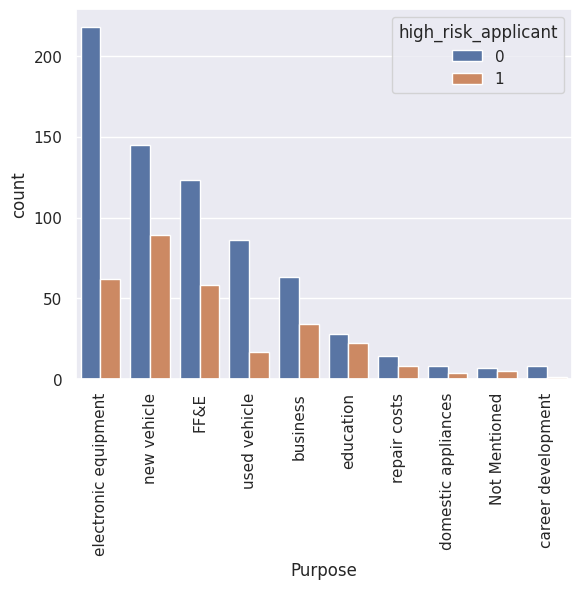

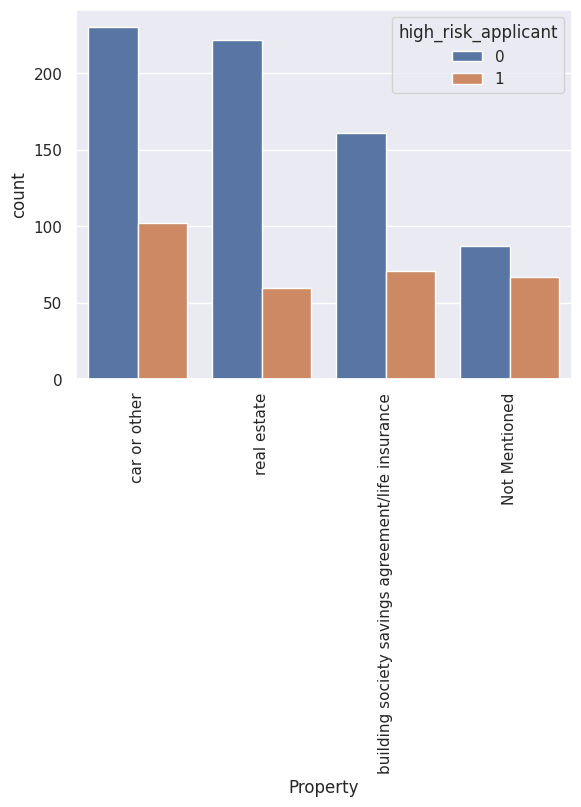

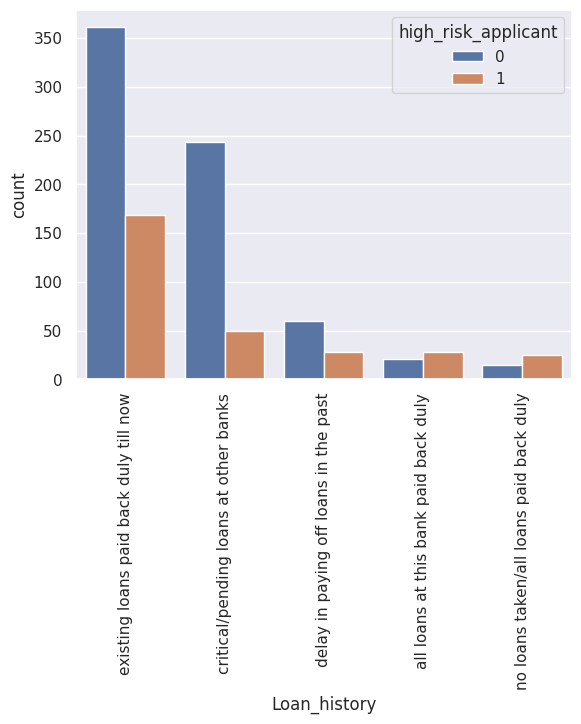

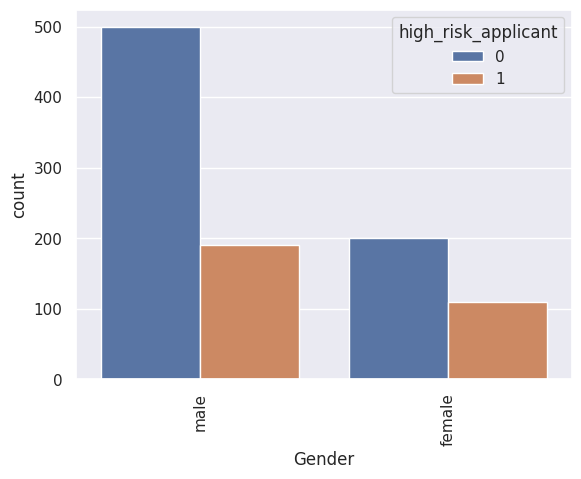

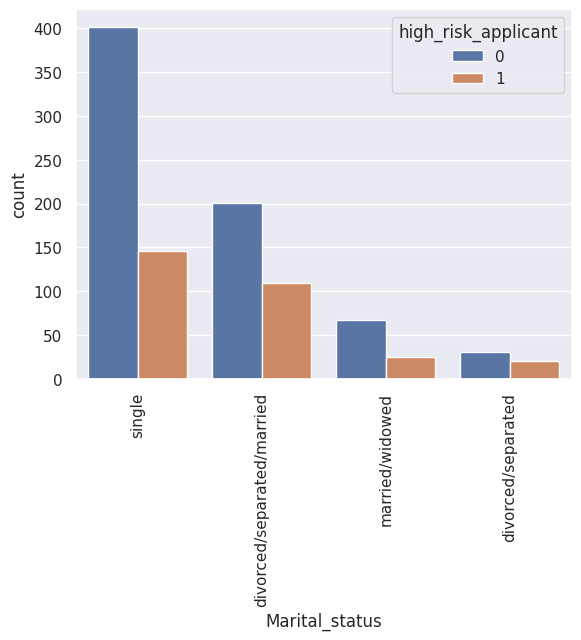

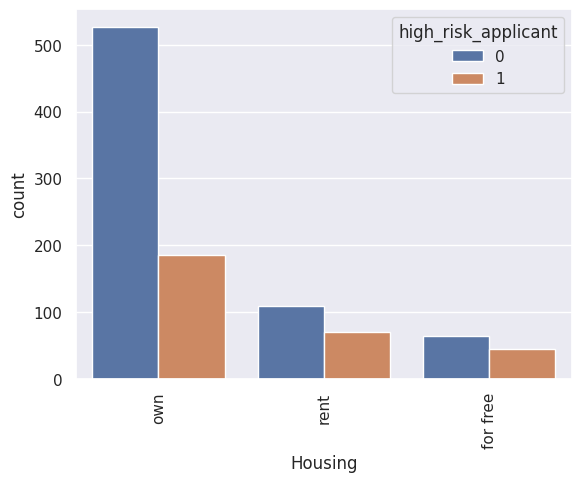

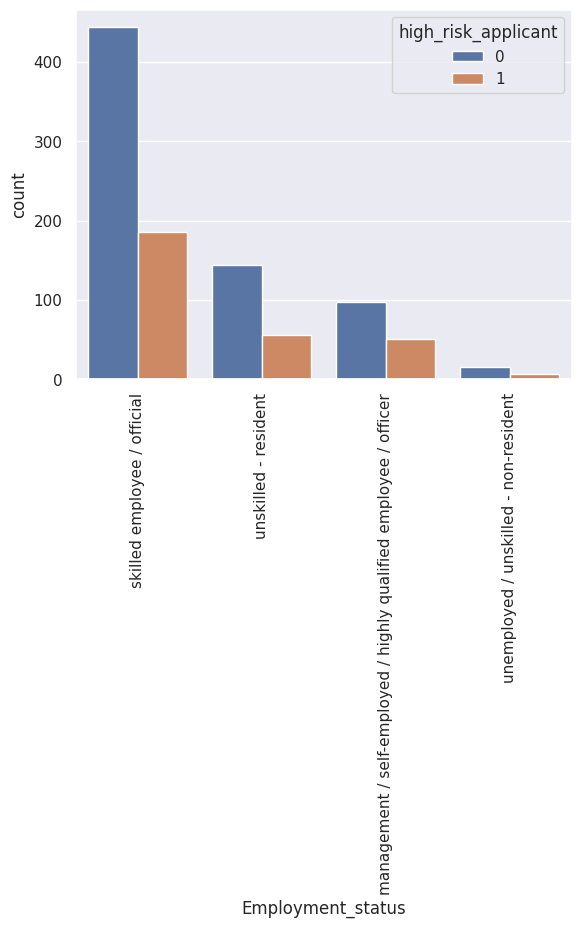

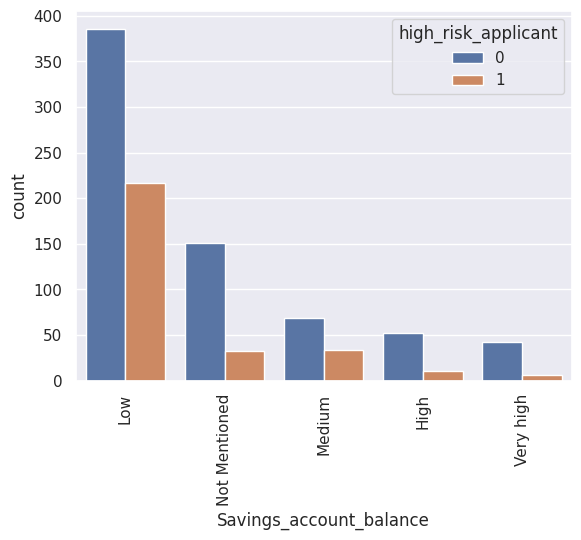

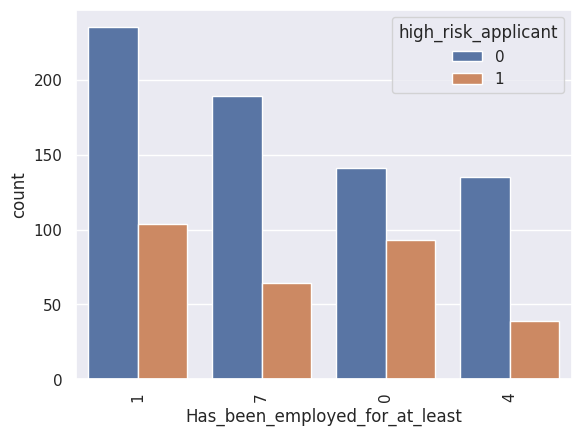

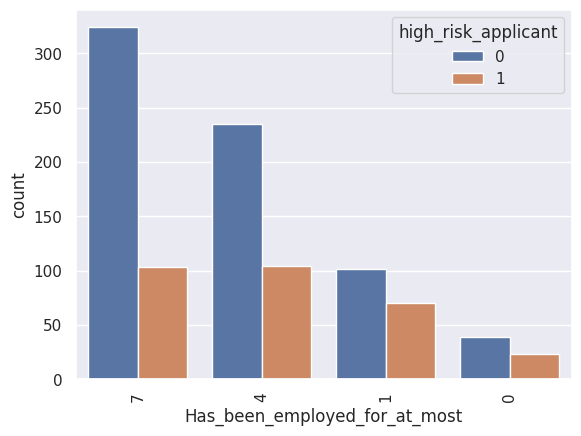

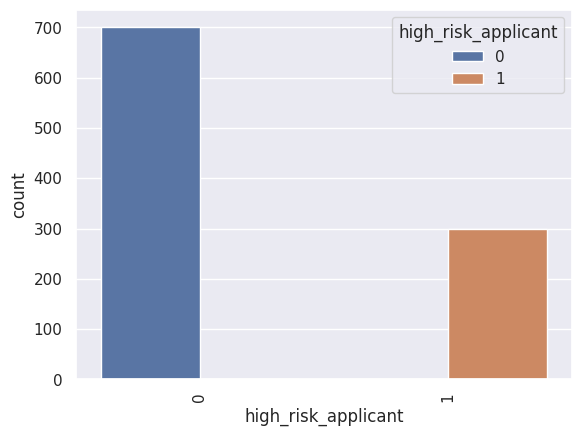

In [72]:
for i,col in enumerate(cat_cols):
  sns.countplot(x=col,data=df,hue="high_risk_applicant",order=df[col].value_counts().index)  
  plt.xticks(rotation=90)
  plt.show()

Lets check distribution of numerical variables with the high_risk_applicant as hue

In [74]:
len(num_cols)

10

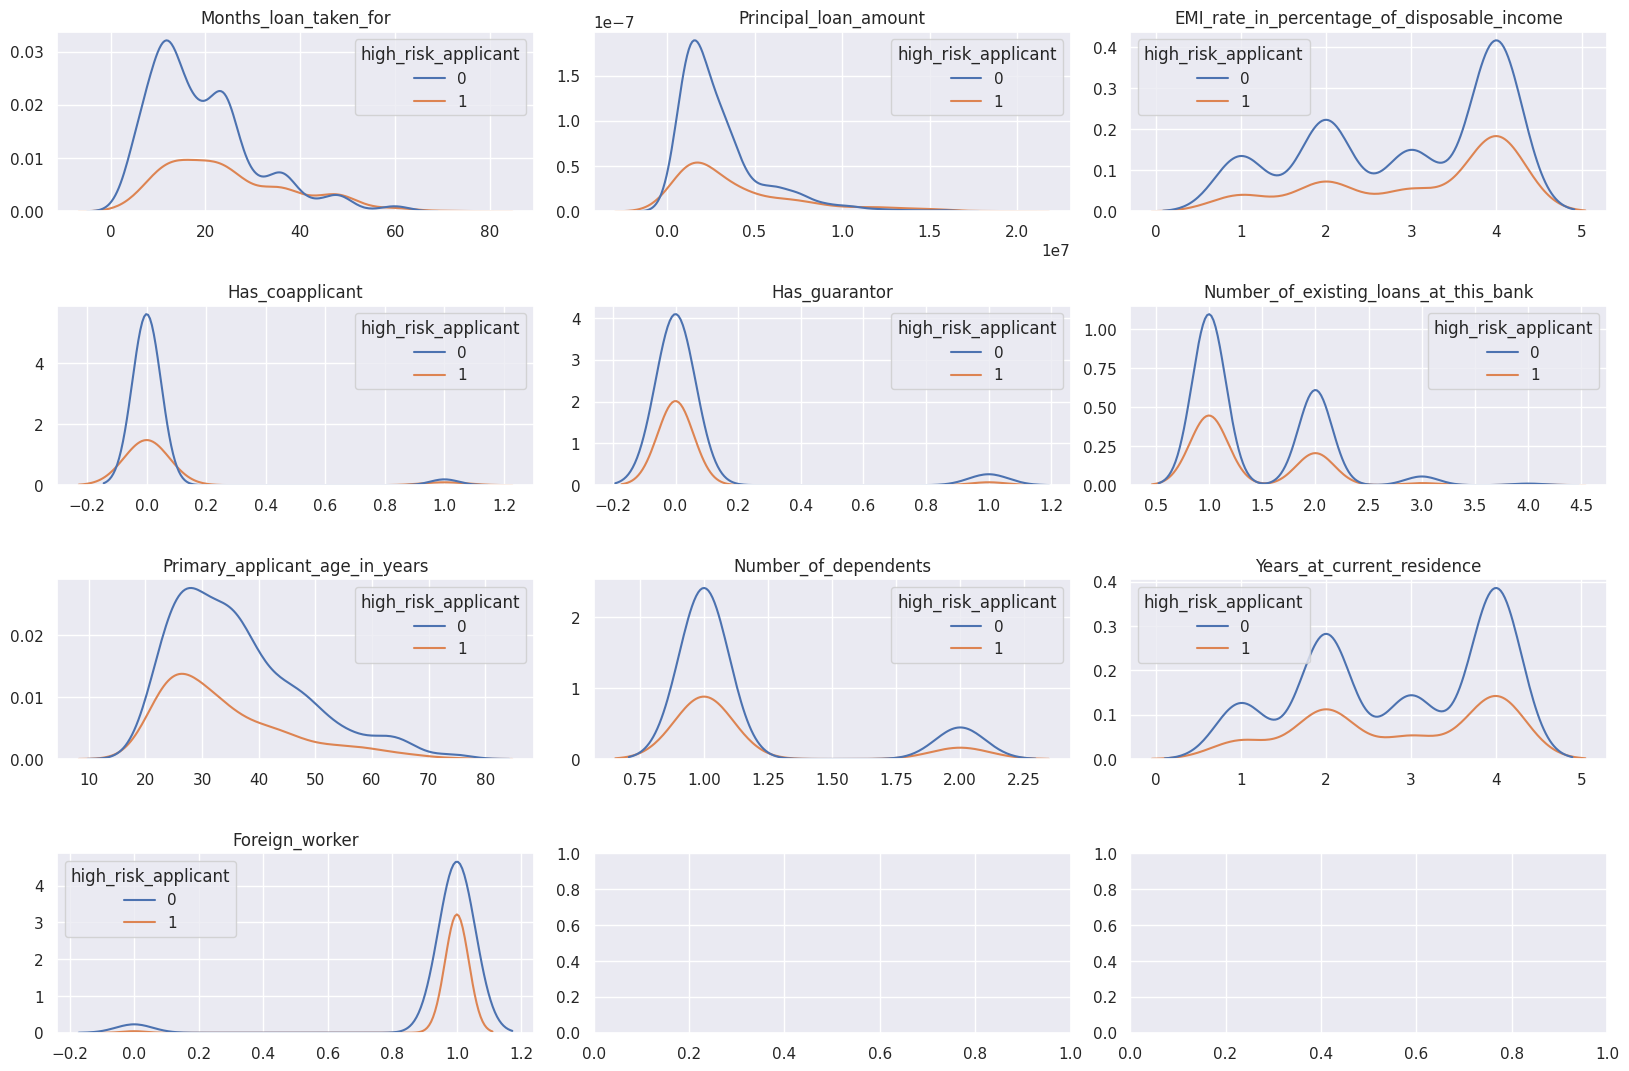

In [200]:
r = 4
c = 3
fig,axes = plt.subplots(r,c,figsize=(20,13))
fig.subplots_adjust(hspace=0.525, wspace=0.125)
for i,col in enumerate(num_cols):
  sns.kdeplot(x=col,data=df,hue='high_risk_applicant',ax=axes[i//c][i%c])
  axes[i//c][i%c].set(ylabel=None,xlabel=None)
  axes[i//c][i%c].set_title(col)

We can see that almost all data is skewed

Key Observations

*   Most applicants are foreign workers
*   Most applicant are young indicating that older people are financially stable and don't need loans
*   Most loans are taken in the range of Rs. 100000 to Rs. 1000000 
*   Most loans are taken for between 5 to 25 months



Lets check the relation of principal loan amount with age

In [99]:
df.columns

Index(['Months_loan_taken_for', 'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Foreign_worker', 'Savings_account_balance'],
      dtype='object')

<Axes: xlabel='Primary_applicant_age_in_years', ylabel='Principal_loan_amount'>

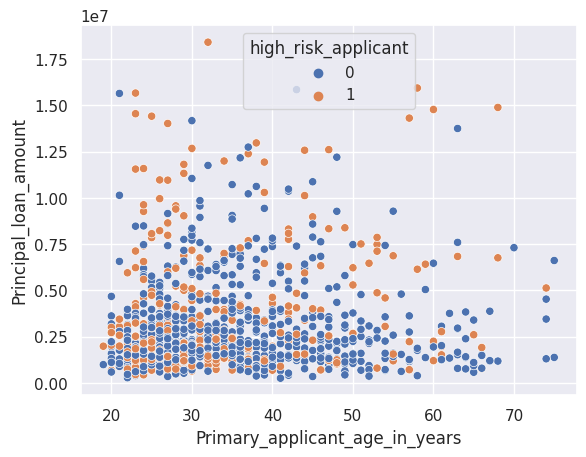

In [102]:
sns.scatterplot(x='Primary_applicant_age_in_years',y='Principal_loan_amount',hue="high_risk_applicant",data=df)

We can see that high principal amount with high applicant age leads to high_risk_applicant

Lets check the relation of principal loan amount with Months_loan_taken_for

<Axes: xlabel='Months_loan_taken_for', ylabel='Principal_loan_amount'>

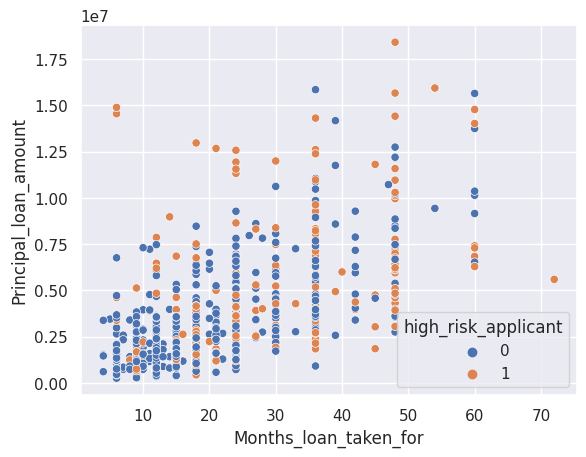

In [101]:
sns.scatterplot(x='Months_loan_taken_for',y='Principal_loan_amount',hue="high_risk_applicant",data=df)

Lets check the relation of age with years at residence

<Axes: xlabel='Years_at_current_residence', ylabel='Primary_applicant_age_in_years'>

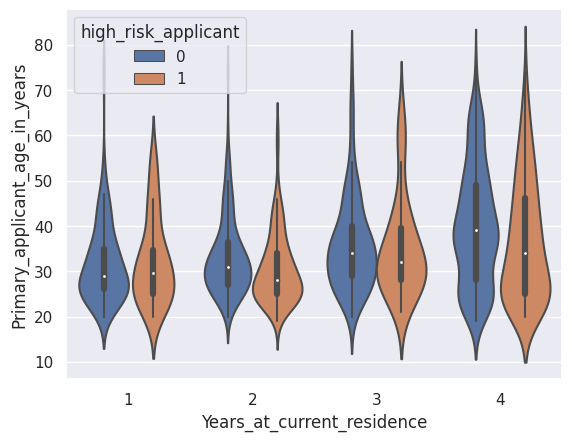

In [109]:
sns.violinplot(y='Primary_applicant_age_in_years',x='Years_at_current_residence',hue="high_risk_applicant",data=df)

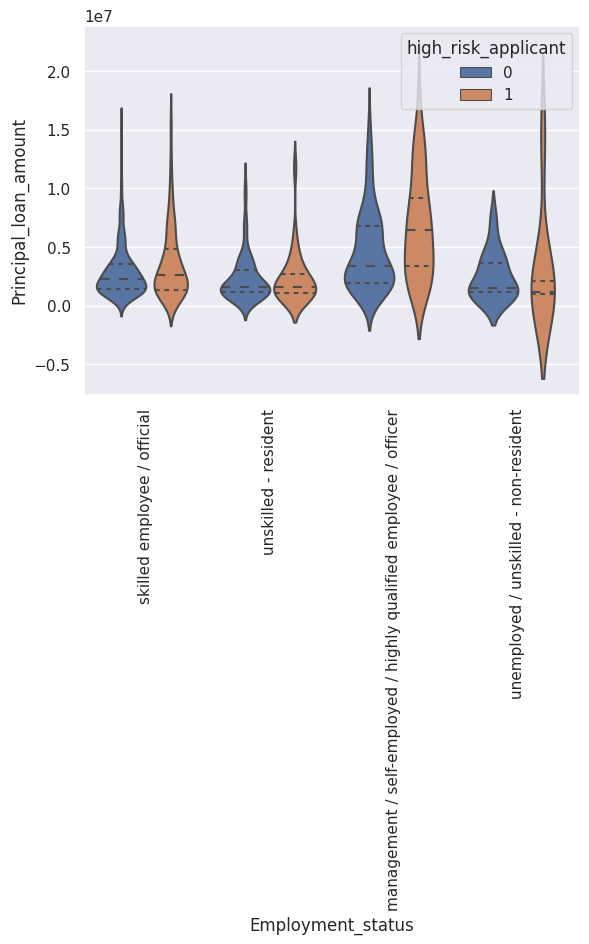

In [106]:
sns.violinplot(x="Employment_status",y = "Principal_loan_amount" ,data=df , inner="quartile",hue="high_risk_applicant")
plt.xticks(rotation=90)
plt.show()

Self Employed people apply for higher pricipal amount

Umemployed people are more prone to taking higher principal amount and not paying back

Relation of gender with principal amount taken

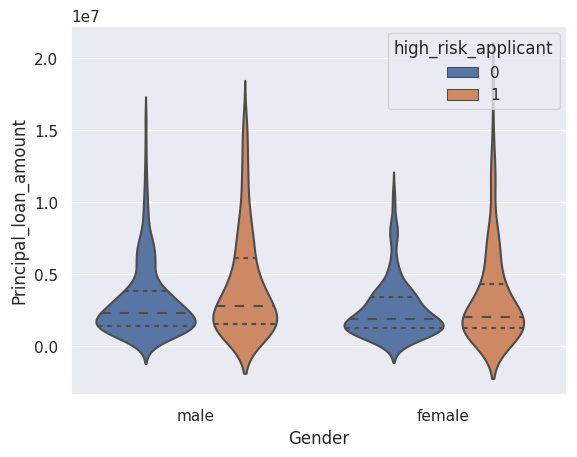

In [110]:
sns.violinplot(x="Gender",y = "Principal_loan_amount" ,data=df , inner="quartile",hue="high_risk_applicant")
plt.show()

Higher principal amount taken by males may get paid back but higher principal amount taken by females are not paid back

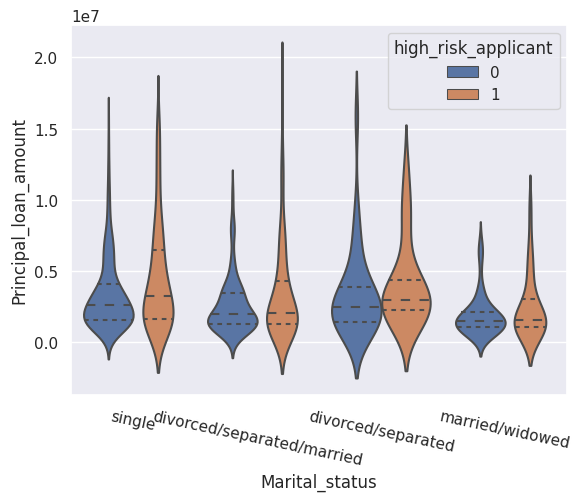

In [116]:
sns.violinplot(x="Marital_status",y = "Principal_loan_amount" ,data=df , inner="quartile",hue="high_risk_applicant")
plt.xticks(rotation=-12)
plt.show()

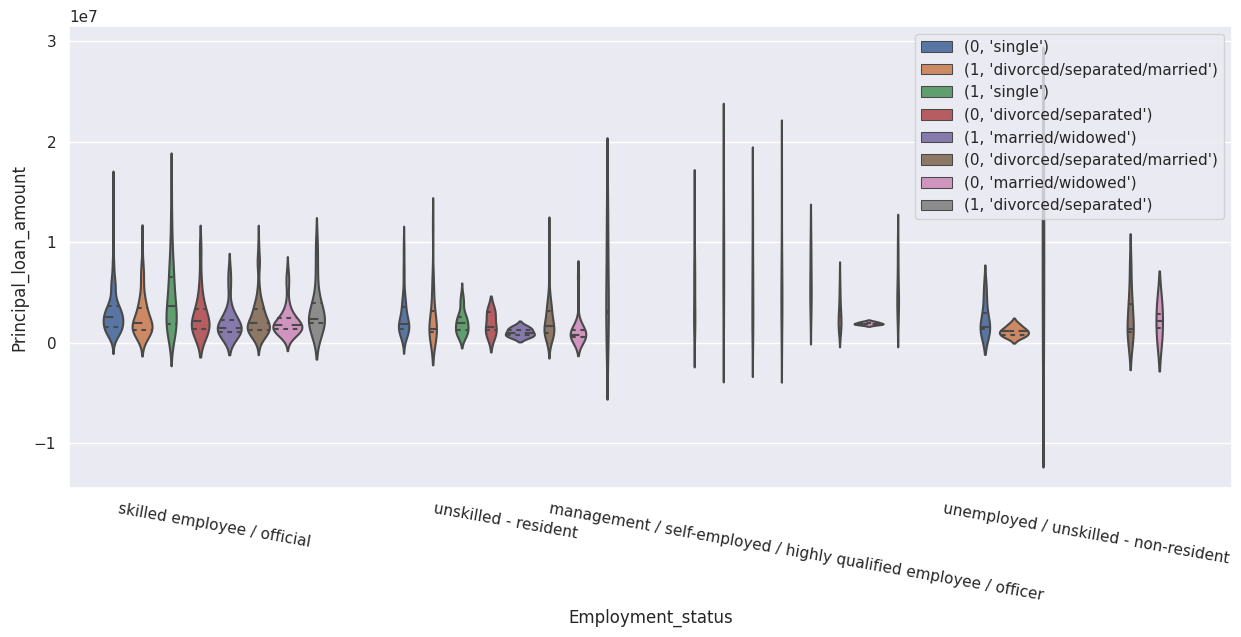

In [205]:
plt.figure(figsize=(15,6))
sns.violinplot(x='Employment_status',y = "Principal_loan_amount" ,data=df , inner="quartile",hue=df[["high_risk_applicant","Marital_status"]].apply(tuple, axis=1))
plt.xticks(rotation=-10)
plt.show()

Unemployed/ Unskilled poeple who are married/divorced are high_risk_applicants

Majority People are skilled

## Feature importance

Lets check which features are important

In [135]:
df.head(2)

,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,...,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance
0,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0,...,male,single,1,own,4,skilled employee / official,7,7,1,Not Mentioned
1,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1,...,female,divorced/separated/married,1,own,2,skilled employee / official,1,4,1,Low


Lets prepare the data for a model by scaling and converting catagorical columns

In [136]:
fdf = df.copy()

label econding categorical columns

In [137]:
from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col in cat_cols:
  le = LabelEncoder()
  fdf[col] = le.fit_transform(fdf[col])
  le_dict[col] = le

In [138]:
fdf.head(3)

,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,...,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance
0,6,6,1169000,4,3,0,0,2,1,0,...,1,3,1,1,4,1,3,3,1,3
1,48,6,5951000,2,3,0,0,1,3,1,...,0,1,1,1,2,1,1,2,1,1
2,12,5,2096000,2,3,0,0,1,1,0,...,1,3,2,1,3,3,2,3,1,1


In [139]:
X = fdf.drop(['high_risk_applicant'],axis=1)
y = fdf['high_risk_applicant']
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier()

In [141]:
feature_scores = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False).to_frame()
feature_scores

,0
Principal_loan_amount,0.153851
Primary_applicant_age_in_years,0.124630
Months_loan_taken_for,0.117022
Purpose,0.071534
Loan_history,0.065059
Savings_account_balance,0.057572
Property,0.052329
Years_at_current_residence,0.048630
EMI_rate_in_percentage_of_disposable_income,0.048470
Has_been_employed_for_at_least,0.038138


Lets check feature importance using pearson correlation matrix

In [142]:
fdf.corr()['high_risk_applicant'].sort_values(ascending=False).to_frame()

,high_risk_applicant
high_risk_applicant,1.000000
Months_loan_taken_for,0.214927
Principal_loan_amount,0.154739
Loan_history,0.097054
Foreign_worker,0.082079
EMI_rate_in_percentage_of_disposable_income,0.072404
Has_coapplicant,0.062728
Housing,0.019315
Years_at_current_residence,0.002967
Number_of_dependents,-0.003015


From above two correlation tables we can conclude that Months_loan_taken_for and
Principal_loan_amount are most important features. Therefore, we should segment are customers based on these two features

In [146]:
df['Principal_loan_amount'].describe()

count    1.000000e+03
mean     3.271258e+06
std      2.822737e+06
min      2.500000e+05
25%      1.365500e+06
50%      2.319500e+06
75%      3.972250e+06
max      1.842400e+07
Name: Principal_loan_amount, dtype: float64

<Axes: xlabel='Principal_loan_amount', ylabel='Count'>

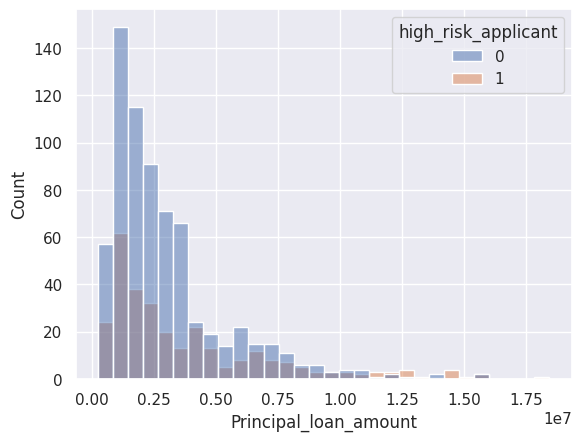

In [156]:
sns.histplot(x="Principal_loan_amount",data=df,hue="high_risk_applicant",bins=30)

We can divide the principal loan amount into
*   Low : 100000 - 1000000
*   Medium : 1000000 - 5000000
*   High : 5000000 - 18000000

In [157]:
def get_amount_cat(x):
  if(x <= 1000000):
    return "Low"
  elif(x <= 5000000):
    return "Medium"
  return "High"

In [160]:
df['Principal_loan_amount_cat'] = df['Principal_loan_amount'].apply(lambda x : get_amount_cat(x))
df.head(1)

,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,...,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Principal_loan_amount_cat
0,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0,...,single,1,own,4,skilled employee / official,7,7,1,Not Mentioned,Medium


In [145]:
df['Months_loan_taken_for'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Months_loan_taken_for, dtype: float64

<Axes: xlabel='Months_loan_taken_for', ylabel='Count'>

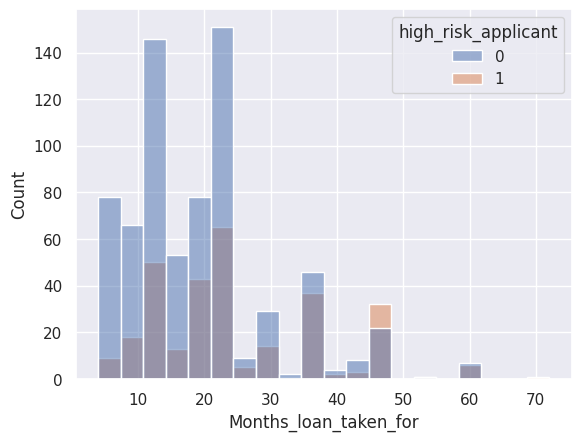

In [161]:
sns.histplot(x="Months_loan_taken_for",data=df,hue="high_risk_applicant",bins=20)

In [181]:
def get_months(x):
  x = int(x)
  if(x <= 20):
    return "Short"
  elif(x <= 40):
    return "Medium"
  return "Long"

In [182]:
df['Months_loan_taken_for_cat'] = df['Months_loan_taken_for'].apply(lambda x : get_months(x))
df.head(1)

,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,...,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Principal_loan_amount_cat,Months_loan_taken_for_cat
0,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0,...,1,own,4,skilled employee / official,7,7,1,Not Mentioned,Medium,Short


<Axes: xlabel='Months_loan_taken_for_cat', ylabel='count'>

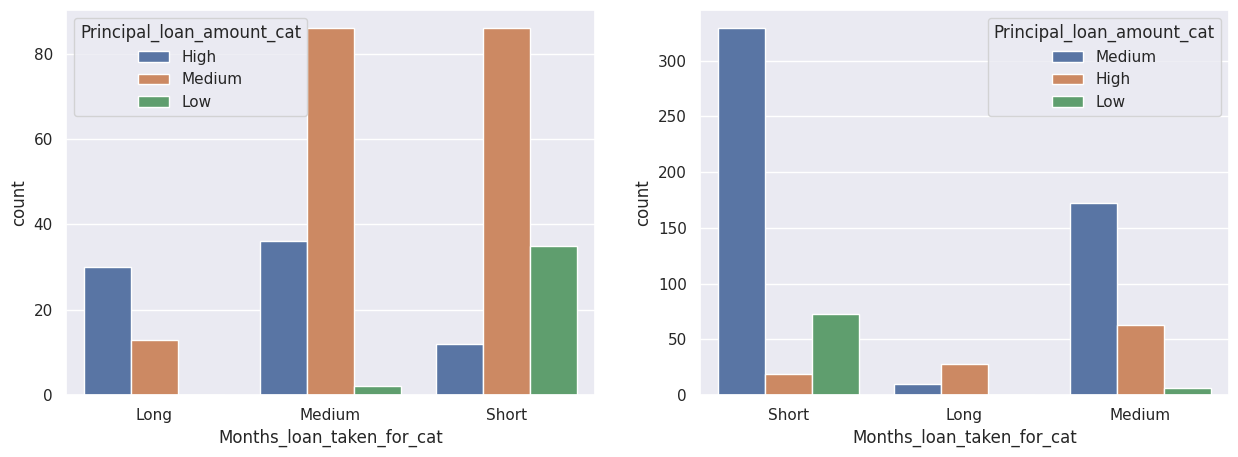

In [198]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Months_loan_taken_for_cat',data=df[df['high_risk_applicant'] == 1],hue="Principal_loan_amount_cat",ax=axes[0])
sns.countplot(x='Months_loan_taken_for_cat',data=df[df['high_risk_applicant'] == 0],hue="Principal_loan_amount_cat",ax=axes[1])

### **We can segment customers like** :
*  Long term high principal cost amount
*  Short term Medium Principal Amount
*  Medium term Medium Principal Amount
*  Short term  Short Principal Amount